# Tracing Rumours by analyzing social media data

## Importing necessary libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from collections import defaultdict 
import itertools
from pylab import rcParams
import random

## Importing input file

In [159]:
data = pd.read_csv('input.csv')
data

,A,B,06:00,hii
0,B,A,06:01,hello bro
1,A,B,06:02,how are you ?
2,B,A,06:03,fyn and u?
3,A,B,06:04,fyn
4,B,A,06:05,bro ! have you heard the news
...,...,...,...,...
73,E,C,11:45,Finally feeling good!!
74,E,K,11:45,Schools reopen next month
75,E,L,11:45,Schools reopen next month
76,E,M,11:45,Schools reopen next month


## Data Preprocessing - Module 1

In [160]:
def datapreprocessing(data):
    ip = np.array(data)[:,:]

    printedSet = set()
    printedDict = {}
    i = 0
    for x in ip:
        if x[3] not in printedSet:
            print(i+1,')',x[3])
            printedSet.add(x[3])
            printedDict[i] = x[3]
            i+=1

    trace_msg = int(input("Message to be traced: ")) - 1
    rows,cols= np.where(ip==printedDict[trace_msg])
    ip = ip[rows]
    return ip

In [161]:
preprocessed_data = datapreprocessing(data)
preprocessed_data

1 ) hello bro
2 ) how are you ?
3 ) fyn and u?
4 ) fyn
5 ) bro ! have you heard the news
6 ) what news?
7 ) ronaldo is taking retirement next week.
8 ) OMG! thats so sad.
9 ) i am a big fan of ronaldo and i am sure that he is not taking his retirement next week 
10 ) but my friend told that he is retiring next week.
11 ) please dont spread fake news. confirm the news before spreding it.
12 ) ok
13 ) dont eat chicken.corona virus can spread through chicken
14 ) OMG really
15 ) yes.dont eat chicken
16 ) ok.thanks for informing
17 ) spred this news to your friends and make sure they wont get affected.
18 ) no thats not true. i am a virologist and i am sure that corona virus wont spred through chicken.
19 ) ohh sorry uncle my friend sent me that msg.
20 ) we can eat chicken.chicken provides protiens that helps to increase our immunity system and can face the corona virus.
21 ) ok uncle.i will inform this to my friend.
22 ) what are you doing?
23 ) i am preparing for the exam
24 ) but tmro 

array([['B', 'A', '06:07', 'ronaldo is taking retirement next week.'],
       ['A', 'C', '06:08', 'ronaldo is taking retirement next week.'],
       ['A', 'D', '06:08', 'ronaldo is taking retirement next week.'],
       ['A', 'E', '06:08', 'ronaldo is taking retirement next week.'],
       ['A', 'F', '06:08', 'ronaldo is taking retirement next week.'],
       ['A', 'G', '06:08', 'ronaldo is taking retirement next week.'],
       ['A', 'H', '06:08', 'ronaldo is taking retirement next week.'],
       ['F', 'E', '06:09', 'ronaldo is taking retirement next week.'],
       ['F', 'H', '06:09', 'ronaldo is taking retirement next week.'],
       ['F', 'G', '06:09', 'ronaldo is taking retirement next week.'],
       ['G', 'I', '06:10', 'ronaldo is taking retirement next week.'],
       ['E', 'I', '06:10', 'ronaldo is taking retirement next week.'],
       ['G', 'J', '06:10', 'ronaldo is taking retirement next week.']],
      dtype=object)

## Contact Sequence - Module 2

In [162]:
def contactSequence(preprocessed_data):
    graph = {x[0]: [] for x in preprocessed_data}
    for x in preprocessed_data:
        graph[x[0]]+=[x[1],x[2]],
    for x in graph:
        print(x, ' : ', graph[x])

In [163]:
print("Contact sequence:\n")
contactSequence(preprocessed_data)

Contact sequence:

B  :  [['A', '06:07']]
A  :  [['C', '06:08'], ['D', '06:08'], ['E', '06:08'], ['F', '06:08'], ['G', '06:08'], ['H', '06:08']]
F  :  [['E', '06:09'], ['H', '06:09'], ['G', '06:09']]
G  :  [['I', '06:10'], ['J', '06:10']]
E  :  [['I', '06:10']]


## Temporal Network Construction - Module 3

In [164]:
def constructNetwork(data):
    g = nx.DiGraph()
    for x in data:
        g.add_node(x[0])
        g.add_node(x[1])
        g.add_edge(x[0],x[1],time=x[2])
    pos =graphviz_layout(g, prog='dot')
    nx.draw(g, pos, node_color="lightgrey", with_labels=1)
    nx.draw_networkx_edge_labels(g,pos)
    plt.show()
    return g

Temporal Network:



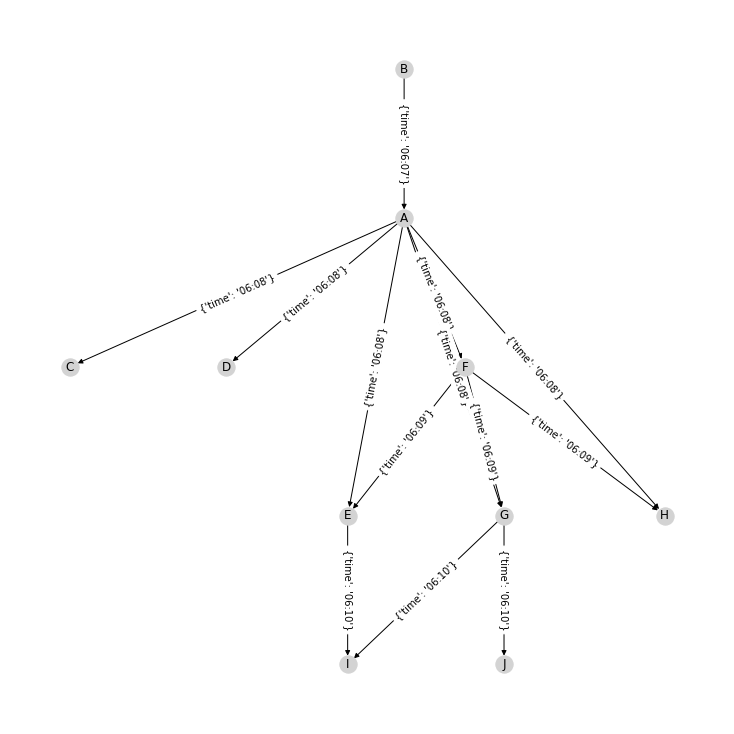

In [165]:
print("Temporal Network:\n")
rcParams['figure.figsize'] = [10,10]
tracegraph = constructNetwork(preprocessed_data)

## Identification of Time Respecting Paths - Module 4

Time respecting paths:
['B', 'A', 'C']


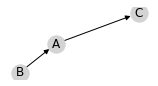

['B', 'A', 'D']


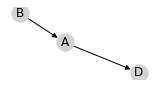

['B', 'A', 'E', 'I']


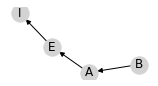

['B', 'A', 'F', 'E', 'I']


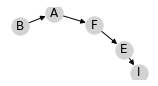

['B', 'A', 'F', 'H']


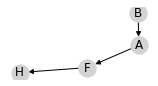

['B', 'A', 'F', 'G', 'I']


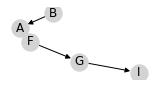

['B', 'A', 'F', 'G', 'J']


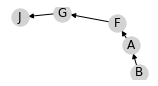

['B', 'A', 'G', 'I']


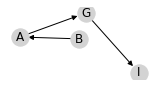

['B', 'A', 'G', 'J']


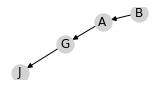

['B', 'A', 'H']


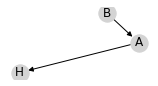

In [166]:
rcParams['figure.figsize'] = 2,1
spot_ids = [{'time':x[2], 'source':x[0], 'target':x[1]} for x in preprocessed_data]
spot_ids = pd.DataFrame(spot_ids)
graph = nx.DiGraph()
paths_graph = nx.DiGraph()
for t, spot in spot_ids.iterrows():
    graph.add_edge(ord(spot['source'])-65, ord(spot['target'])-65, attr_dict=dict(t=t))
def dfs(s): 
     
    path.append(s) 
    visited[s] = True
  
    
    if outdeg0[s] and indeg0[path[0]]: 
        temp_list = []
        for x in path:
            temp_list +=chr(x+65)
        print(temp_list)
        paths_graph.clear()
        for i in range(len(path)):
            try:
                paths_graph.add_edge(chr(path[i]+65),chr(path[i+1]+65))
            except:
                pass
        pos = nx.spring_layout(paths_graph)
        nx.draw(paths_graph, pos, node_color="lightgrey", with_labels=1)
        plt.show()
    
    for node in adj[s]: 
        if not visited[node]: 
            dfs(node) 
    path.pop() 
    visited[s] = False
  
  
def print_all_paths(n): 
    for i in range(n): 
  
        if indeg0[i] and adj[i]: 
            path = [] 
            visited = [False] * (n + 1) 
            dfs(i)

n = max(graph.nodes())

visited = [False] * (n + 1) 
path = [] 

edges = graph.edges()

adj = defaultdict(list) 
indeg0 = [True]*(n+1)
outdeg0 = [True]*(n+1)
  
for edge in edges:
    u, v = edge[0], edge[1] 

    adj[u].append(v) 

    indeg0[v] = False

    outdeg0[u] = False
print('Time respecting paths:') 
print_all_paths(n)

In [167]:
network = preprocessed_data

## Randomization of model - Module 5

Edge randomized model 1


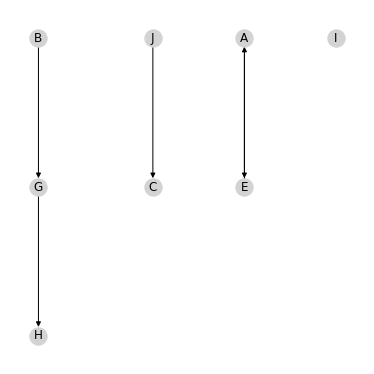

Edge randomized model 2


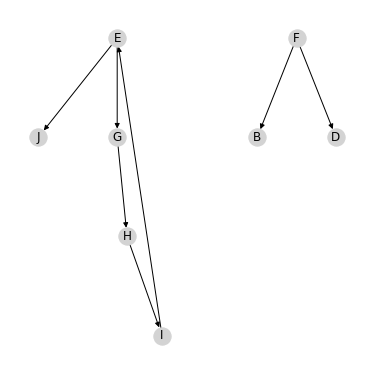

Edge randomized model 3


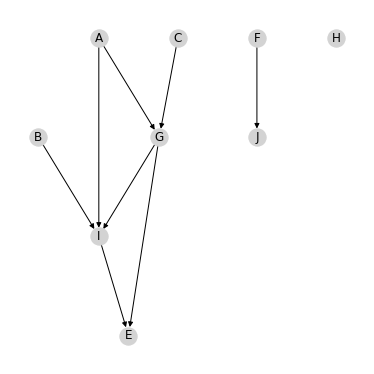

Edge randomized model 4


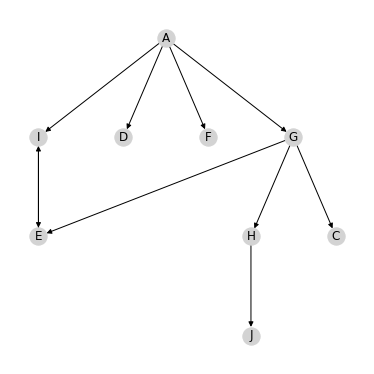

 {'B': 0.0591715976331361, 'A': 0.35502958579881655, 'C': 0.0, 'D': 0.0, 'E': 0.0591715976331361, 'F': 0.17751479289940827, 'G': 0.1183431952662722, 'H': 0.0, 'I': 0.0, 'J': 0.0}


In [168]:
def randomizeAndStudy(network, tracegraph):
    timesSent = len(network)
    nodedict = {}
    graph1 = nx.DiGraph()
    rcParams['figure.figsize'] = [5,5]
    if len(list(tracegraph.edges())) !=1:
        for _ in range(4):
            print('Edge randomized model',_+1)
            edge = tracegraph.edges()
            for x in edge:
                i,j = x[0],x[1]
                iprime, jprime = x[0], x[1]
                dup = list(edge).copy()
                while (iprime, jprime) == (i,j):
                    iprime,jprime = random.choice(dup)
                randnum = random.randrange(0,2)
                if randnum == 0:
                    edge = [(i,jprime) if ele==(i,j) else ele for ele in edge]
                    edge = [(iprime,j) if ele==(iprime,jprime) else ele for ele in edge]
                else:
                    edge = [(i,iprime) if ele==(i,j) else ele for ele in edge]
                    edge = [(j,jprime) if ele==(iprime,jprime) else ele for ele in edge]
            for x in edge:
                graph1.add_edge(x[0], x[1])
            pos =graphviz_layout(graph1, prog='dot')
            nx.draw(graph1, pos, node_color="lightgrey", with_labels=1)
            plt.show()
            graph1.clear()
    else:
        for x in tracegraph.edges():
            graph1.add_edge(x[1],x[0])
            pos =graphviz_layout(graph1, prog='dot')
            nx.draw(graph1, pos, node_color="lightgrey", with_labels=1)
            plt.show()
            graph1.clear()
    for node in network:
        nodedict[node[0]] = 0
        nodedict[node[1]] = 0
    for x in nodedict:
        for node in network:
            if node[0] == x:
                nodedict[x] += 1
            else:
                pass
    for x in nodedict:
        nodedict[x] = (nodedict[x]/timesSent) * 100
        if nodedict[x] != 0.0:
            nodedict[x] = (nodedict[x]) / (timesSent*len(nodedict))
    return nodedict
module5out = randomizeAndStudy(network, tracegraph)
print('',module5out)

## Simplification and Identification of spreaders - Module 6

In [169]:
def identifyspreader(a,network):
    module5out = a.copy()
    zerocount = 0
    if len(network) <=3:
        print('The forward count of the message is not large enough to be considered as a rumour')
        return
    for x in module5out:
        module5out[x] = module5out[x] * (len(module5out)*len(network))
        print('Person ',x,' - ',module5out[x],'%')
        if module5out[x] == 0.0:
            zerocount += 1
    mydict = {x:0 for x in module5out}
    for x in mydict:
        for node in network:
            if node[1] == x:
                mydict[x] += 1
    print('\nInfluential Spreader:')
    for x in mydict:
        if mydict[x] == 0:
            print(x)
            del module5out[x]
    print('Important Spreader(s):')
    for x in module5out:
        if module5out[x] > 20.0:
            print(x)
    return
identifyspreader(module5out,network)

Person  B  -  7.6923076923076925 %
Person  A  -  46.15384615384615 %
Person  C  -  0.0 %
Person  D  -  0.0 %
Person  E  -  7.6923076923076925 %
Person  F  -  23.076923076923077 %
Person  G  -  15.384615384615385 %
Person  H  -  0.0 %
Person  I  -  0.0 %
Person  J  -  0.0 %

Influential Spreader:
B
Important Spreader(s):
A
F
